# Intros
This is a starter kernel ...

In [1]:
# Scaffolding
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

Iris.csv
database.sqlite



In [2]:
import csv

import pylab
import seaborn as sns

from IPython.core.display import display, HTML

# Data samples and traits

In [3]:
data = pd.read_csv("../input/Iris.csv", header = 0)
#reset index
data = data.reset_index()
data.head()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
species_list = list(data["Species"].unique())
print("Types of species: %s" % species_list)
print("Dataset length: %i" % len(data))

print("Sepal length range: [%s, %s]" % (min(data["SepalLengthCm"]), max(data["SepalLengthCm"])))
print("Sepal width range: [%s, %s]" % (min(data["SepalWidthCm"]), max(data["SepalLengthCm"])))

print("Petal length range: [%s, %s]" % (min(data["PetalLengthCm"]), max(data["PetalLengthCm"])))
print("Petal width range: [%s, %s]" % (min(data["PetalWidthCm"]), max(data["PetalWidthCm"])))


Types of species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Dataset length: 150
Sepal length range: [4.3, 7.9]
Sepal width range: [2.0, 7.9]
Petal length range: [1.0, 6.9]
Petal width range: [0.1, 2.5]


**3 types of species**  
Relatively small dataset


# Data analysis - distributions

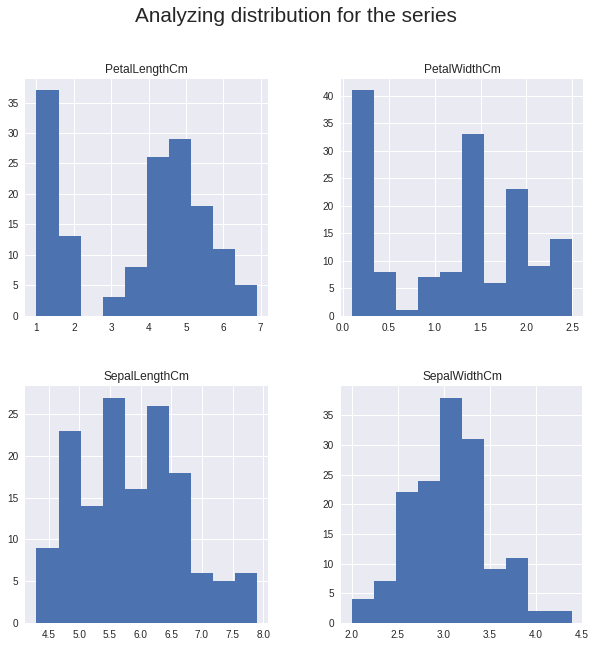

In [5]:
# data.hist calls data.plot
# pandas.DataFrame.plot() returns a matplotlib axis
data.hist(
    column=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

#alternative
#plt.subplot(2,3,1)  # if using subplot
#data.hist(...)
#plt.title('your title')

**Petal length** and **petal width** seem to diverge from the normal distribution.

# Data analysis - correlations

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


array([[ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]], dtype=bool)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000           NaN            NaN           NaN
SepalWidthCm       -0.109369      1.000000            NaN           NaN
PetalLengthCm       0.871754     -0.420516       1.000000           NaN
PetalWidthCm        0.817954     -0.356544       0.962757           1.0


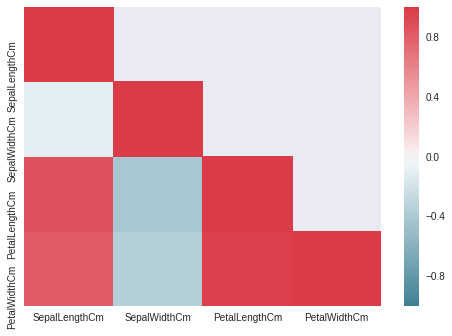

In [10]:
display(HTML('<h1>Analyzing the ' +
             '<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">' +
             'Pearson correlation coefficient</a></h1>'))

# data without the indexes
dt = data[data.columns[2:]]

# method : {‘pearson’, ‘kendall’, ‘spearman’}
corr = dt.corr(method="pearson") #returns a dataframe, so it can be reused
display(corr)

bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
display(bool_upper_matrix)

corr = corr.where(bool_upper_matrix)
print(corr)

# seaborn matrix here
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Interpretation
Diagonal values and upper triangle are ignored (melted the upper triangle through **np.tril** and **df.where**).  
Naturally, we find:

+ a **high positive correlation** between PetalWidth and PetalLength (**0.96**)
+ a **high positive correlation** between PetalLength and SepalLength (**0.87**)
+ a **high positive correlation** between PetalWidth and SepalLength (**0.81**)


### Theory
PCC is:

+ 1 is total positive linear correlation
+ 0 is no linear correlation
+ −1 is total negative linear correlation

